In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kurtosis,skew
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore') 

In [2]:
iris1 = pd.read_csv("C:\\Users\\mps\\OneDrive - University of Waterloo\\Documents\\Assignment 657\\Iris\Kaggle Iris\\iris_train.csv")
iris1.shape

(105, 5)

In [3]:
iris1.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [4]:
iris1['species'].value_counts()

Iris-setosa        35
Iris-virginica     35
Iris-versicolor    35
Name: species, dtype: int64

In [5]:
iris1.isnull().sum()

sepal_length    0
sepal_width     4
petal_length    8
petal_width     0
species         0
dtype: int64

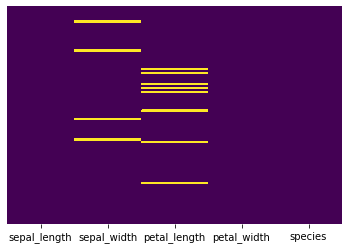

In [6]:
sns.heatmap(iris1.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [7]:
iris1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,101.000000,97.000000,105.000000
mean,5.858909,3.059083,3.812370,1.199708
std,0.861638,0.455116,1.793489,0.787193
min,4.344007,1.946010,1.033031,-0.072203
25%,5.159145,2.768688,1.545136,0.333494
50%,5.736104,3.049459,4.276817,1.331797
75%,6.435413,3.290318,5.094427,1.817211
max,7.795561,4.409565,6.768611,2.603123


In [8]:
iris1[(iris1.petal_width<0)]

,sepal_length,sepal_width,petal_length,petal_width,species
6,4.81174,3.037915,1.494268,-0.042428,Iris-setosa
67,4.86021,3.071128,1.487504,-0.072203,Iris-setosa


In [9]:
#Removing the rows with negative petal_width values
iris2 = iris1[(iris1.petal_width>=0)]
iris2.shape

(103, 5)

In [10]:
#Segregating the data on basis of species and replacing the missing values with corresponding medians
iris_vc=iris2.query('species=="Iris-versicolor"')
iris_vcf =iris_vc.fillna(iris_vc.median())
iris_s=iris2.query('species=="Iris-setosa"')
iris_sf = iris_s.fillna(iris_s.median())
iris_v=iris2.query('species=="Iris-virginica"')
iris_vf = iris_v.fillna(iris_v.median())
iris_f = iris_vcf.append([iris_sf,iris_vf])

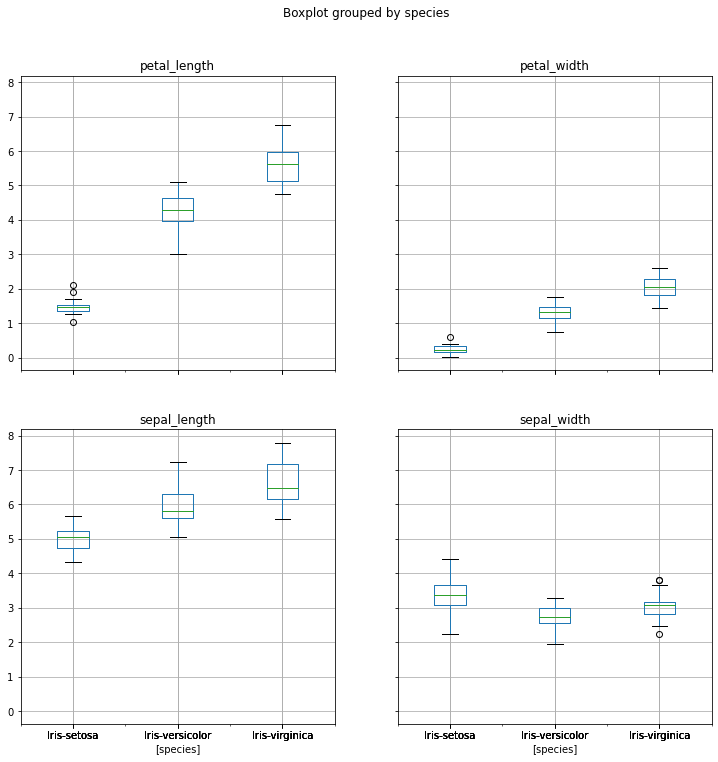

In [11]:
#Box plot to check for the outliers in the data
iris_f.boxplot(by='species', figsize = (12,12));

In [12]:
# The outliers for each feature of the species are found and are replaced with closest boundary value(Upper or lower)

iris_vc2=iris_f.query('species=="Iris-versicolor"')
iris_s2=iris_f.query('species=="Iris-setosa"')
iris_s2.sort_values(by=['petal_length'])
irisf_spl = iris_s2['petal_length']
quantile1spl, quantile3spl= np.percentile(irisf_spl,[25,75])
iqr_valuespl=quantile3spl-quantile1spl
outliers_spl = iris_s2[(iris_s2.petal_length>(quantile3spl +(1.5 * iqr_valuespl))) | (iris_s2.petal_length<(quantile1spl -(1.5 * iqr_valuespl)))]
iris_s2['petal_length'] = np.where(iris_s2.petal_length<(quantile1spl -(1.5 * iqr_valuespl)), quantile1spl -(1.5 * iqr_valuespl), iris_s2.petal_length)
iris_s2['petal_length'] = np.where(iris_s2.petal_length>(quantile3spl +(1.5 * iqr_valuespl)), quantile3spl +(1.5 * iqr_valuespl), iris_s2.petal_length)


iris_s2.sort_values(by=['petal_width'])
irisf_spw = iris_s2['petal_width']
quantile1spw, quantile3spw= np.percentile(irisf_spw,[25,75])
iqr_valuespw=quantile3spw-quantile1spw
outliers_spw = iris_s2[(iris_s2.petal_width>(quantile3spw +(1.5 * iqr_valuespw))) | (iris_s2.petal_width<(quantile1spw -(1.5 * iqr_valuespw)))]
iris_s2['petal_width'] = np.where(iris_s2.petal_width<(quantile1spw -(1.5 * iqr_valuespw)), quantile1spw -(1.5 * iqr_valuespw), iris_s2.petal_width)
iris_s2['petal_width'] = np.where(iris_s2.petal_width>(quantile3spw +(1.5 * iqr_valuespw)), quantile3spw +(1.5 * iqr_valuespw), iris_s2.petal_width)

iris_v2=iris_f.query('species=="Iris-virginica"')
iris_v2.sort_values(by=['sepal_width'])
irisf_vsw = iris_v2['sepal_width']
quantile1vsw, quantile3vsw= np.percentile(irisf_vsw,[25,75])
iqr_valuevsw=quantile3vsw-quantile1vsw
outliers_vsw = iris_v2[(iris_v2.sepal_width>(quantile3vsw +(1.5 * iqr_valuevsw))) | (iris_v2.sepal_width<(quantile1vsw -(1.5 * iqr_valuevsw)))]
iris_v2['sepal_width'] = np.where(iris_v2.sepal_width<(quantile1vsw -(1.5 * iqr_valuevsw)), quantile1vsw -(1.5 * iqr_valuevsw), iris_v2.sepal_width)
iris_v2['sepal_width'] = np.where(iris_v2.sepal_width>(quantile3vsw +(1.5 * iqr_valuevsw)), quantile3vsw +(1.5 * iqr_valuevsw), iris_v2.sepal_width)


print("petal width: \n" ,outliers_spw)
print("petal length: \n" ,outliers_spl)
print("sepal width v: \n" ,outliers_vsw)

iris_f2 = iris_vc2.append([iris_s2,iris_v2])


petal width: 
     sepal_length  sepal_width  petal_length  petal_width      species
79       5.03385     3.742203      1.805112     0.594614  Iris-setosa
petal length: 
     sepal_length  sepal_width  petal_length  petal_width      species
46      4.736073     3.482242      1.919475     0.262137  Iris-setosa
79      5.033850     3.742203      2.103637     0.594614  Iris-setosa
80      4.344007     3.018625      1.033031     0.104012  Iris-setosa
sepal width v: 
     sepal_length  sepal_width  petal_length  petal_width         species
38      7.665933     3.802924      6.463494     2.086840  Iris-virginica
42      5.959186     2.227918      5.189638     1.453949  Iris-virginica
77      7.540961     3.797087      6.617141     2.051317  Iris-virginica


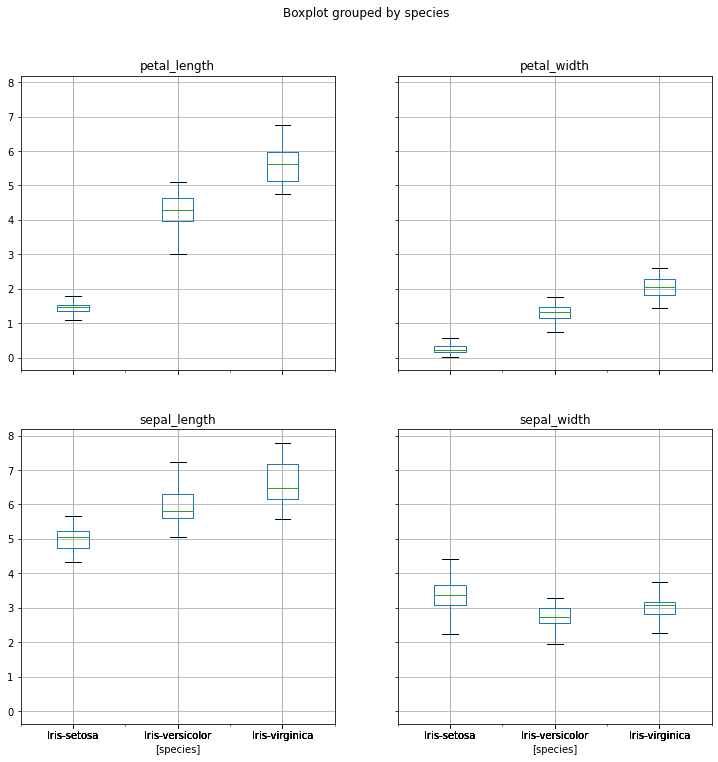

In [13]:
#Box plot to check if the outliers are removed
iris_f2.boxplot(by='species', figsize = (12,12));

In [14]:
#Dividiing each dataset into features(X) and target(Y)
target=["species"]
cols=[col for col in iris_f2.columns if col not in target]

x=iris_f2[cols]
y=iris_f2[target]
scaling = MinMaxScaler()
modified_x = scaling.fit_transform(x)
x_df = pd.DataFrame(modified_x,columns = ['sepal_length', 'sepal_width','petal_length','petal_width'])

x_train, x_val, y_train, y_val = train_test_split(x_df, y, test_size=0.2, random_state=275)

 #Training the model on train data
z=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
#Fitting the classifier to data
z.fit(x_train,y_train)
k_value = [1,5,10,15,20,25,30,35]
result_list = []
for k in k_value:
    n=KNeighborsClassifier(n_neighbors=k)
    n.fit(x_train,y_train)
    y=n.predict(x_val)
    result = round(metrics.accuracy_score(y_val,y),2)
    result_list.append(result)
df= pd.DataFrame(result_list,k_value,columns = ['Accuracy scores on Val data'])
df

,Accuracy scores on Val data
1,0.95
5,1.00
10,0.95
15,0.90
20,0.86
25,0.76
30,0.76
35,0.76


In [15]:
iris_t = pd.read_csv("C:\\Users\\mps\\OneDrive - University of Waterloo\\Documents\\Assignment 657\\Iris\Kaggle Iris\\iris_test.csv")
iris_t.shape

(45, 5)

In [16]:
x_test = iris_t[['sepal_length', 'sepal_width','petal_length','petal_width']]
scaling = MinMaxScaler()
modified_x = scaling.fit_transform(x_test)
x_df = pd.DataFrame(modified_x,columns = ['sepal_length', 'sepal_width','petal_length','petal_width'])
y = z.predict(x_df)
y1=np.where(y=='Iris-setosa',0,np.where(y=='Iris-versicolor',1,np.where(y=='Iris-virginica',2,y)))
y2 =pd.DataFrame(y1,columns=['species'])
iris_t1 =pd.DataFrame(iris_t['id'],columns=['id'])
y_final = pd.concat([iris_t1, y2], axis=1)
y_final

,id,species
0,0,2
1,1,1
2,2,1
3,3,1
4,4,2
5,5,2
6,6,1
7,7,1
8,8,0
9,9,2


In [17]:
y_final.to_csv(r'C:\\Users\\mps\\OneDrive - University of Waterloo\\Documents\\Assignment 657\\Iris\Output Iris\\Test_y_31_1.csv',index=False)